OBJECTIVE

Build a system that can predict the prices for vehicles using data on Vehicle specifications,
make, etc. Explore the data to understand the features and figure out an approach.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving dataset.csv to dataset.csv


In [ ]:
import pandas as pd

df = pd.read_csv('dataset.csv')  # Replace with your actual filename


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings


<module 'warnings' from '/usr/lib/python3.11/warnings.py'>

In [ ]:
df = pd.read_csv('dataset.csv')  # Replace with actual filename
df.head()


,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Remove rows with missing price or mileage
df = df[df['price'].notnull() & df['mileage'].notnull()]

# Convert mileage to numeric
df['mileage'] = df['mileage'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)

# Replace or fill missing values (basic approach)
df.fillna('Unknown', inplace=True)


<ipython-input-10-4b429d5ebcc4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'] = df['mileage'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)
<ipython-input-10-4b429d5ebcc4>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Unknown', inplace=True)
<ipython-input-10-4b429d5ebcc4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.filln

In [ ]:
# Create vehicle age
df['vehicle_age'] = 2024 - df['year']

# Drop high-cardinality or less useful columns (optional)
df.drop(columns=['name', 'description', 'engine', 'year'], inplace=True)


In [ ]:
#Encode Categorical Features

from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns

# Convert all values in categorical columns to string
df[categorical_cols] = df[categorical_cols].astype(str)

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
# Train and Test Split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Model Training

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
# Evaluation

print("MAE:", mean_absolute_error(y_test, y_pred))

# Use np.sqrt() for RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

print("R2 Score:", r2_score(y_test, y_pred))


MAE: 4688.289140669241
RMSE: 9727.338738077317
R2 Score: 0.7906596251327753


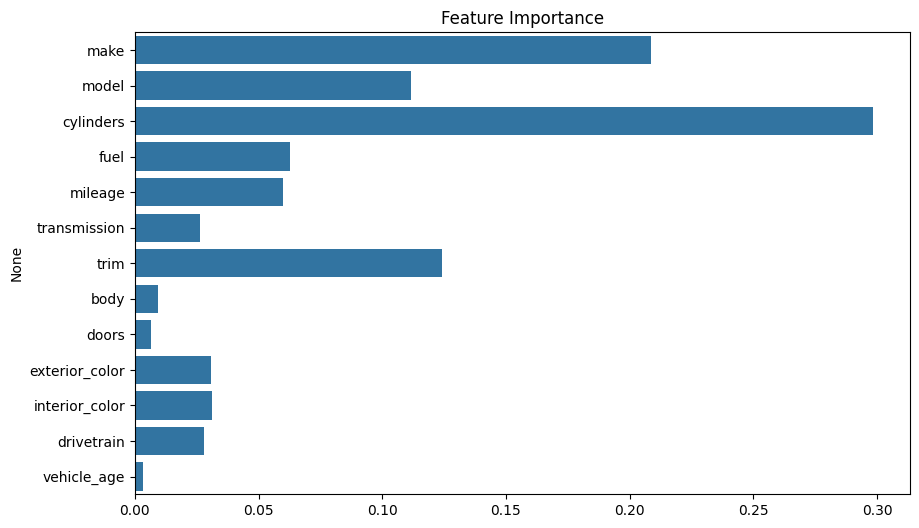

In [ ]:
# Featured Importance

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()


In [ ]:
# Save Model

import joblib
joblib.dump(model, 'vehicle_price_predictor.pkl')


['vehicle_price_predictor.pkl']